In [ ]:
import cv2
import os
import numpy as np

def find_optimal_watermark_size(dataset_folder, scale_factor=0.15):
    """
    Computes the optimal watermark size based on the average image size in the dataset folder.
    The watermark size is chosen as a percentage of the average image dimensions.
    
    :param dataset_folder: Path to the dataset folder containing images
    :param scale_factor: Percentage of image size to use for watermark (default: 15%)
    :return: (wm_width, wm_height) - Optimal watermark dimensions
    """
    total_width, total_height, count = 0, 0, 0

    for filename in os.listdir(dataset_folder):
        file_path = os.path.join(dataset_folder, filename)
        img = cv2.imread(file_path)

        if img is not None:
            h, w = img.shape[:2]
            total_width += w
            total_height += h
            count += 1

    if count == 0:
        print("Error: No valid images found in the dataset folder.")
        return None

    avg_width = total_width // count
    avg_height = total_height // count

    # Optimal watermark size as 15% of average image size
    wm_width = int(avg_width * scale_factor)
    wm_height = int(avg_height * scale_factor)

    print(f"Optimal Watermark Size: {wm_width} x {wm_height}")
    return wm_width, wm_height

def resize_watermark(image_path, output_path, size):
    """
    Resizes the given watermark image to the computed optimal size.
    
    :param image_path: Path to the watermark image
    :param output_path: Path to save the resized watermark image
    :param size: (width, height) tuple for resizing
    """
    watermark = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)  # Preserve transparency if PNG
    if watermark is None:
        print("Error: Could not load watermark image.")
        return
    
    resized_wm = cv2.resize(watermark, size, interpolation=cv2.INTER_AREA)
    cv2.imwrite(output_path, resized_wm)
    print(f"Resized watermark saved at: {output_path}")

# ------------------------------
# Main Execution
# ------------------------------

dataset_folder = "./watermark_dataset/2048x2048"  # Change this to your dataset folder path
watermark_path = "./watermarks/original_watermark.png"  # Watermark image to resize
output_path = "./watermarks/watermark2048.png"  # Output resized watermark path

optimal_size = find_optimal_watermark_size(dataset_folder)

if optimal_size:
    resize_watermark(watermark_path, output_path, optimal_size)


In [ ]:
import os
from PIL import Image

# ✅ Define source and destination folders
SOURCE_FOLDER = "./watermark_dataset/256x256"  # Change to your source folder
DEST_FOLDER = "./watermark_dataset/256x256"  # Change to your destination folder
TARGET_SIZE = (256, 256)  # Resize to (width, height)

# ✅ Create destination folder if it doesn't exist
os.makedirs(DEST_FOLDER, exist_ok=True)

def resize_images():
    """Resizes all images in the source folder and saves them to the destination folder."""
    
    image_count = 0

    for filename in os.listdir(SOURCE_FOLDER):
        source_path = os.path.join(SOURCE_FOLDER, filename)
        dest_path = os.path.join(DEST_FOLDER, filename)

        try:
            # Open and resize image
            with Image.open(source_path) as img:
                img = img.convert("RGB")  # Ensure consistent format
                img_resized = img.resize(TARGET_SIZE)

                # Save resized image
                img_resized.save(dest_path)
                image_count += 1
                print(f"✔ Resized and saved: {dest_path}")

        except Exception as e:
            print(f"⚠ Error processing {filename}: {e}")

    print(f"\n✅ {image_count} images resized and saved in '{DEST_FOLDER}'.")

# ✅ Run the script
resize_images()


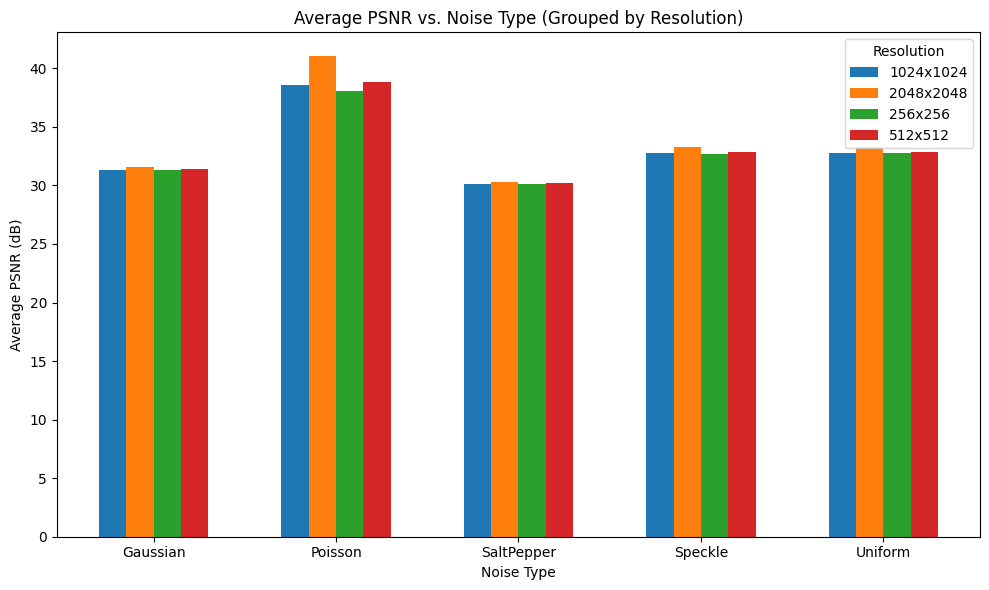

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
df = pd.read_csv("image_metrics.csv")

# Group data by Noise Type and Resolution, computing the average PSNR for each combination.
avg_df = df.groupby(["Noise Type", "Resolution"])["PSNR"].mean().reset_index()

# Pivot the DataFrame so that Noise Type is the index and Resolution columns hold the average PSNR values.
pivot_df = avg_df.pivot(index="Noise Type", columns="Resolution", values="PSNR")

# Reset index to make plotting easier
pivot_df = pivot_df.reset_index()

# Create a grouped bar chart using seaborn or matplotlib.
plt.figure(figsize=(10, 6))

# Set the width of each bar group and number of resolution bars
bar_width = 0.15
noise_types = pivot_df["Noise Type"]
resolutions = pivot_df.columns[1:]  # All resolution columns

# Determine the x locations for groups
x = range(len(noise_types))

# Plot a bar for each resolution
for i, res in enumerate(resolutions):
    # Calculate bar positions for this resolution
    positions = [pos + bar_width * i for pos in x]
    plt.bar(positions, pivot_df[res], width=bar_width, label=f"{res}")

# Set x-axis tick labels in the middle of the group
mid_positions = [pos + bar_width*(len(resolutions)/2 - 0.5) for pos in x]
plt.xticks(mid_positions, noise_types)

# Add labels and title
plt.xlabel("Noise Type")
plt.ylabel("Average PSNR (dB)")
plt.title("Average PSNR vs. Noise Type (Grouped by Resolution)")
plt.legend(title="Resolution", loc="upper right")
plt.tight_layout()
plt.show()


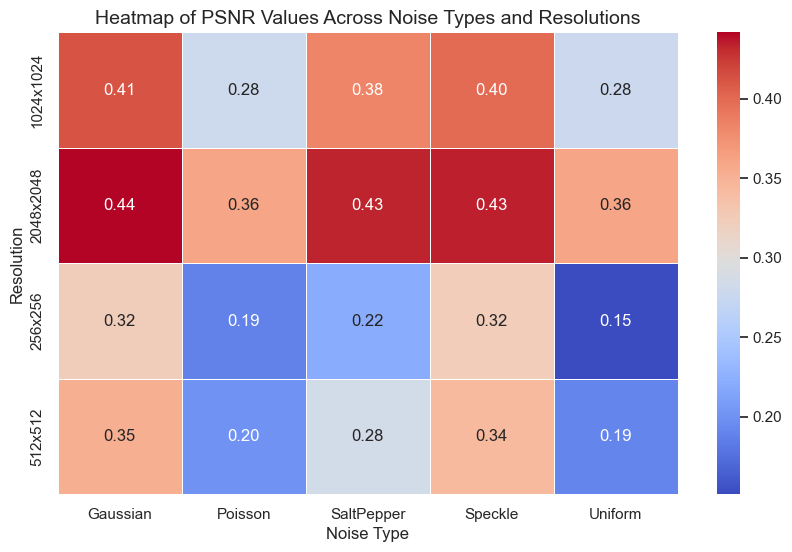

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv("watermark_metrics.csv")  # Update with your actual file name

# Group by Resolution and Noise Type, then calculate the average PSNR
heatmap_data = df.groupby(["Resolution", "Noise Type"])["SSIM"].mean().unstack()

# Set plot size
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add title and labels
plt.title("Heatmap of PSNR Values Across Noise Types and Resolutions", fontsize=14)
plt.xlabel("Noise Type", fontsize=12)
plt.ylabel("Resolution", fontsize=12)

# Show the plot
plt.show()
